# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [8]:
df = pd.read_csv('data/am_pm.csv')
df

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


In [126]:
X = df[['am', 'pm']].values 
y = df['target'].values

array(['working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day'], dtype=object)

In [10]:
lr = LogisticRegression(random_state=21, fit_intercept=False)
lr.fit(X, y)
y_pred = lr.predict(X)

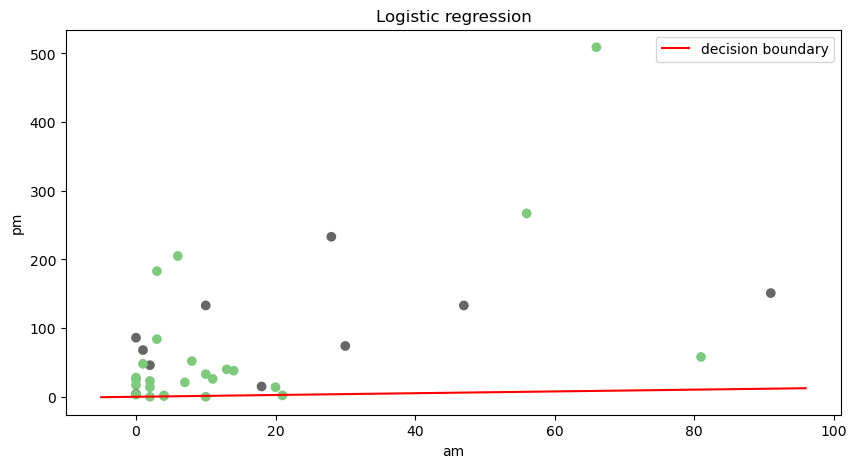

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df['am'], df['pm'], c=[0 if i == 'working_day' else 1 for i in df['target']], cmap='Accent')
plt.xlabel('x')
plt.ylabel('y')

x_plot = np.array([min(df['am']) - 5, max(df['am']) + 5]) # назначаем область линии принятия решений так, чтобы она немного выходила за крайние точки
y_plot = (-1 / lr.coef_[0][1]) * lr.coef_[0][0] * x_plot # здесь записано уравнение прямой, где угол наклона выражанется через коэффициенты регрессии(веса предикторов)

ax.plot(x_plot, y_plot, label='decision boundary', color='red') # строим линию
ax.set_title('Logistic regression') # все подписываем
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

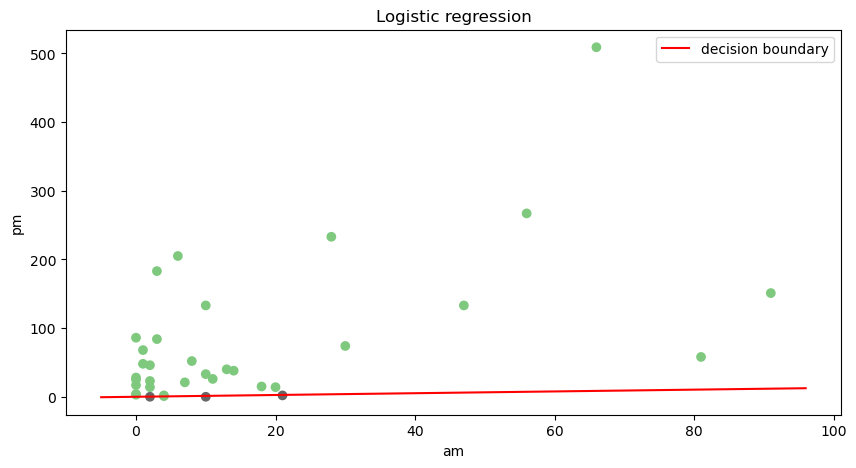

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df['am'], df['pm'], c=[0 if i == 'working_day' else 1 for i in df['predict']], cmap='Accent')
plt.xlabel('x')
plt.ylabel('y')

x_plot = np.array([min(df['am']) - 5, max(df['am']) + 5]) # назначаем область линии принятия решений так, чтобы она немного выходила за крайние точки
y_plot = (-1 / lr.coef_[0][1]) * lr.coef_[0][0] * x_plot # здесь записано уравнение прямой, где угол наклона выражанется через коэффициенты регрессии(веса предикторов)

ax.plot(x_plot, y_plot, label='decision boundary', color='red') # строим линию
ax.set_title('Logistic regression') # все подписываем
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [16]:
sc = StandardScaler()
df_sc = df
df_sc[['am', 'pm']] = sc.fit_transform(X)

In [20]:
lr = LogisticRegression(fit_intercept=False, random_state=21)
X = df_sc[['am', 'pm']] # Берем в качестве переменных преобразованную выборку
y = df_sc.target # Назначаем целевую переменную
lr.fit(X, y) # Тренируем регрессию
y_sc = lr.predict(X) # Сохраняем предсказания
df_sc['predict'] = y_sc # заносим найденные значения в датафрейм для построения графика

In [22]:
accuracy_score(y, y_sc) # точность повысилась

0.7428571428571429

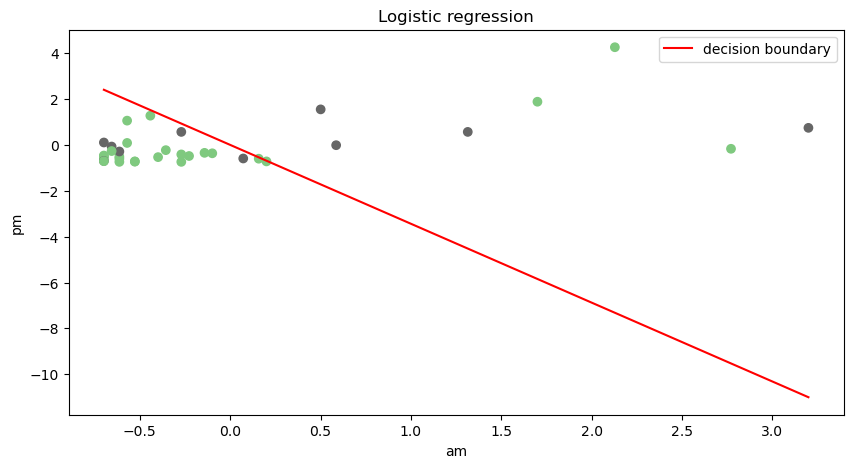

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df['am'], df_sc['pm'], c=[0 if i == 'working_day' else 1 for i in df_sc['target']], cmap='Accent')
plt.xlabel('x')
plt.ylabel('y')

x_plot = np.array([min(df_sc['am']), max(df_sc['am'])]) # назначаем область линии принятия решений так, чтобы она немного выходила за крайние точки
y_plot = (-1 / lr.coef_[0][1]) * lr.coef_[0][0] * x_plot # здесь записано уравнение прямой, где угол наклона выражанется через коэффициенты регрессии(веса предикторов)

ax.plot(x_plot, y_plot, label='decision boundary', color='red') # строим линию
ax.set_title('Logistic regression') # все подписываем
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

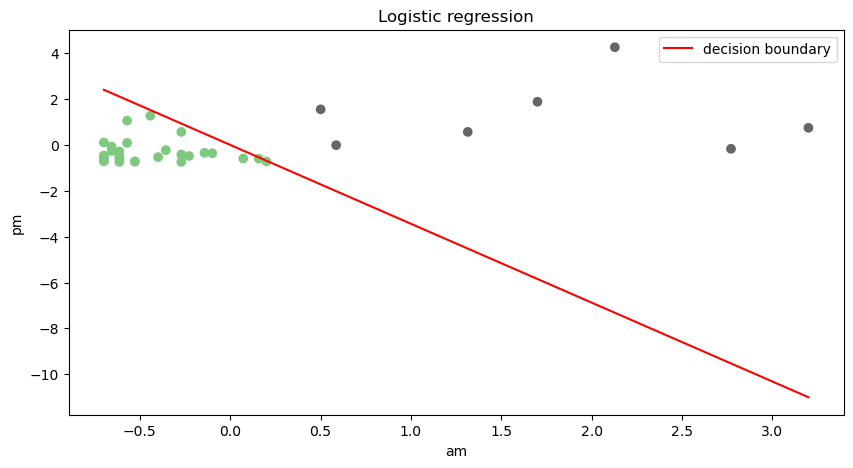

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df['am'], df_sc['pm'], c=[0 if i == 'working_day' else 1 for i in df_sc['predict']], cmap='Accent')
plt.xlabel('x')
plt.ylabel('y')

x_plot = np.array([min(df_sc['am']), max(df_sc['am'])]) # назначаем область линии принятия решений так, чтобы она немного выходила за крайние точки
y_plot = (-1 / lr.coef_[0][1]) * lr.coef_[0][0] * x_plot # здесь записано уравнение прямой, где угол наклона выражанется через коэффициенты регрессии(веса предикторов)

ax.plot(x_plot, y_plot, label='decision boundary', color='red') # строим линию
ax.set_title('Logistic regression') # все подписываем
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

## Точность предсказаний повысилась, на графике точки строго расположены по обеим сторонам линии принятия решения

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

SVM — алгоритм обучения с учителем. Главная цель SVM как классификатора — найти уравнение разделяющей гиперплоскости, которая бы разделила два класса неким оптимальным образом.

Алгоритм SVM устроен таким образом, что он ищет точки на графике, которые расположены непосредственно к линии разделения ближе всего. Эти точки называются опорными векторами. Затем, алгоритм вычисляет расстояние между опорными векторами и разделяющей плоскостью. Это расстояние которое называется зазором. Основная цель алгоритма — максимизировать расстояние зазора. Лучшей гиперплоскостью считается такая гиперплоскость, для которой этот зазор является максимально большим.

In [35]:
svc = SVC(probability=True, random_state=21)
df_svc = df.drop(columns='predict')
df_svc[['am', 'pm']] = sc.fit_transform(X) # Преобразовываем обучающую выборку

In [36]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
cv = GridSearchCV(svc, param_grid, scoring='accuracy')
cv.fit(X.values, y)
cv.best_params_

{'kernel': 'poly'}

In [37]:
clf = SVC(kernel='rbf', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
df_svc['predict_rbf'] = y_svm
accuracy_score(y, y_svm)

0.7428571428571429

In [39]:
clf = SVC(kernel='linear', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
df_svc['predict_linear'] = y_svm
accuracy_score(y, y_svm)

0.7142857142857143

In [41]:
clf = SVC(kernel='poly', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
df_svc['predict_poly'] = y_svm
accuracy_score(y, y_svm)

0.7428571428571429

In [45]:
clf = SVC(kernel='sigmoid', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
df_svc['predict_sigmoid'] = y_svm
accuracy_score(y, y_svm)

0.6857142857142857

In [47]:
df_svc

,date,am,pm,target,predict_rbf,predict_linear,predict_poly,predict_sigmoid
0,2020-04-17,0.200690,-0.719904,working_day,working_day,working_day,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day,working_day,working_day,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day,working_day,working_day,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day,working_day,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day,working_day,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day,working_day,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day,working_day,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day,working_day,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,working_day,working_day,working_day,working_day
9,2020-04-26,0.500501,1.548382,weekend,working_day,working_day,working_day,weekend


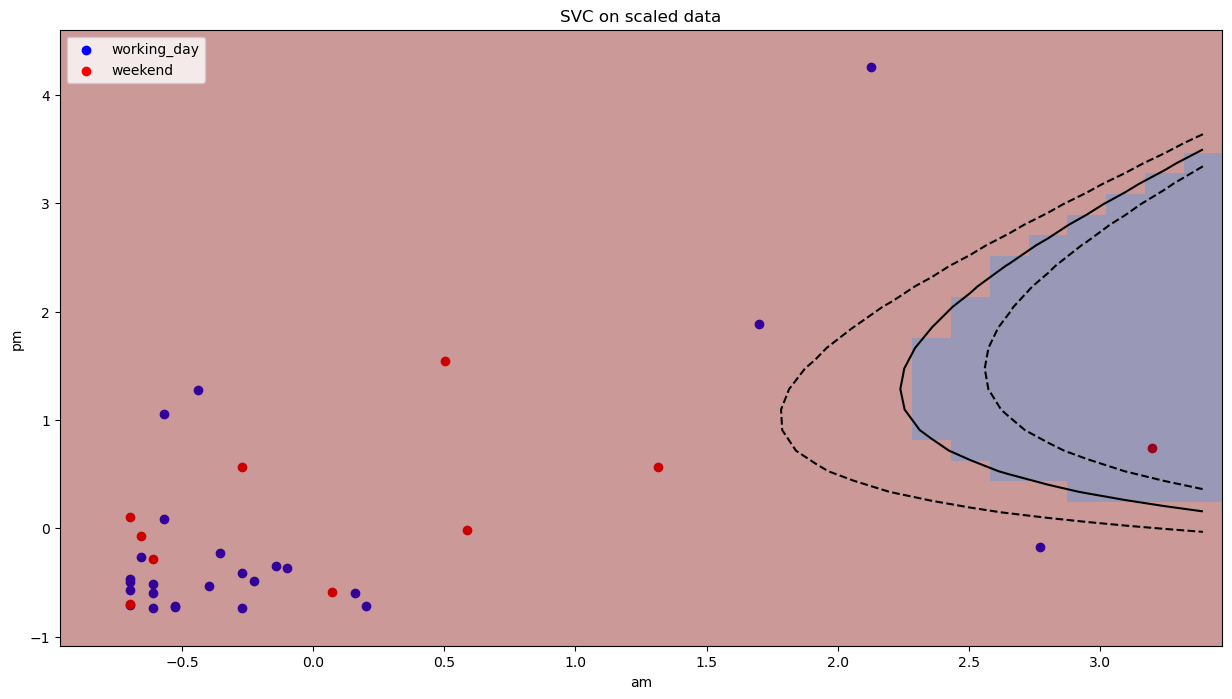

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df_svc.loc[df_svc['target'] == 'working_day']['am'],
           y=df_svc.loc[df_svc['target'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df_svc.loc[df_svc['target'] == 'weekend']['am'],
           y=df_svc.loc[df_svc['target'] == 'weekend']['pm'],
           color='red', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cv.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.4, cmap='seismic')
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC on scaled data')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper left')
plt.show()

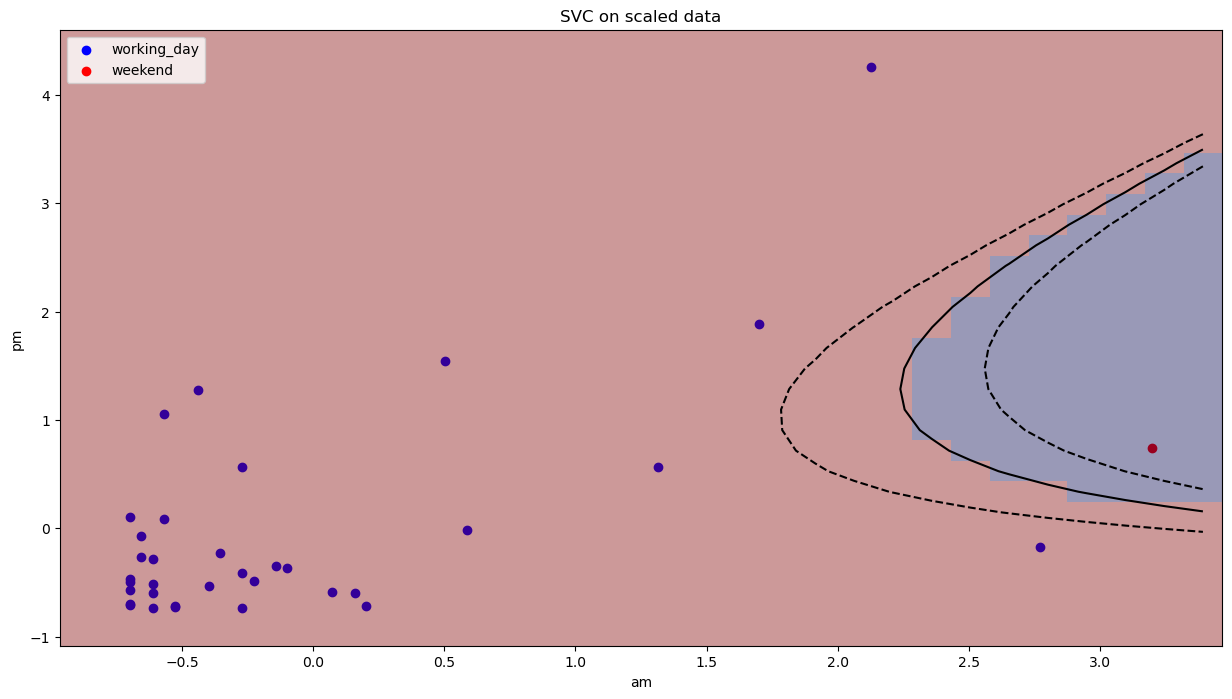

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df_svc.loc[df_svc['predict_poly'] == 'working_day']['am'],
           y=df_svc.loc[df_svc['predict_poly'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df_svc.loc[df_svc['predict_poly'] == 'weekend']['am'],
           y=df_svc.loc[df_svc['predict_poly'] == 'weekend']['pm'],
           color='red', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cv.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.4, cmap='seismic')
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC on scaled data')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper left')
plt.show()

- SVC находит оптимальную границу разделения классов в пространстве признаков. Использует концепцию поддерживающих векторов (support vectors) - точек, которые определяют границу разделения. Максимально увеличивает расстояние между классами (margin) для повышения надёжности классификации. Самыми точными ядрами оказались rbf и poly.

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [110]:
df_dts = df.drop(columns=['predict'])

In [112]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=42)
dtc.fit(X, y)
y_dts = dtc.predict(X)
df_dts['predict_dts'] = y_dts

In [114]:
accuracy_score(y, y_dts)

0.9428571428571428

In [62]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=42) # изменим глубину
dtc.fit(X, y)
y_dts = dtc.predict(X)
accuracy_score(y, y_dts)

0.9714285714285714

In [64]:
dtc = DecisionTreeClassifier(max_depth=6, random_state=42)
dtc.fit(X, y)
y_dts = dtc.predict(X)
accuracy_score(y, y_dts)

1.0

In [140]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X, y)
y_dts = dtc.predict(X)
accuracy_score(y, y_dts)

0.8857142857142857

Чем больше глубина решающего дерева, тем выше точность. При глубине = 6 она достигает 1. Скорее всего модель становится переобученной. Глубину надо подбирать, например, кроссвалидацией

In [201]:
param_grid = {'max_depth': np.arange(4, 7)}
gs = GridSearchCV(
    estimator=dtc,
    param_grid=param_grid,
    cv=5,  # Количество фолдов для кросс-валидации
    scoring='accuracy',
    return_train_score=True
)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([4, 5, 6])},
             return_train_score=True, scoring='accuracy')

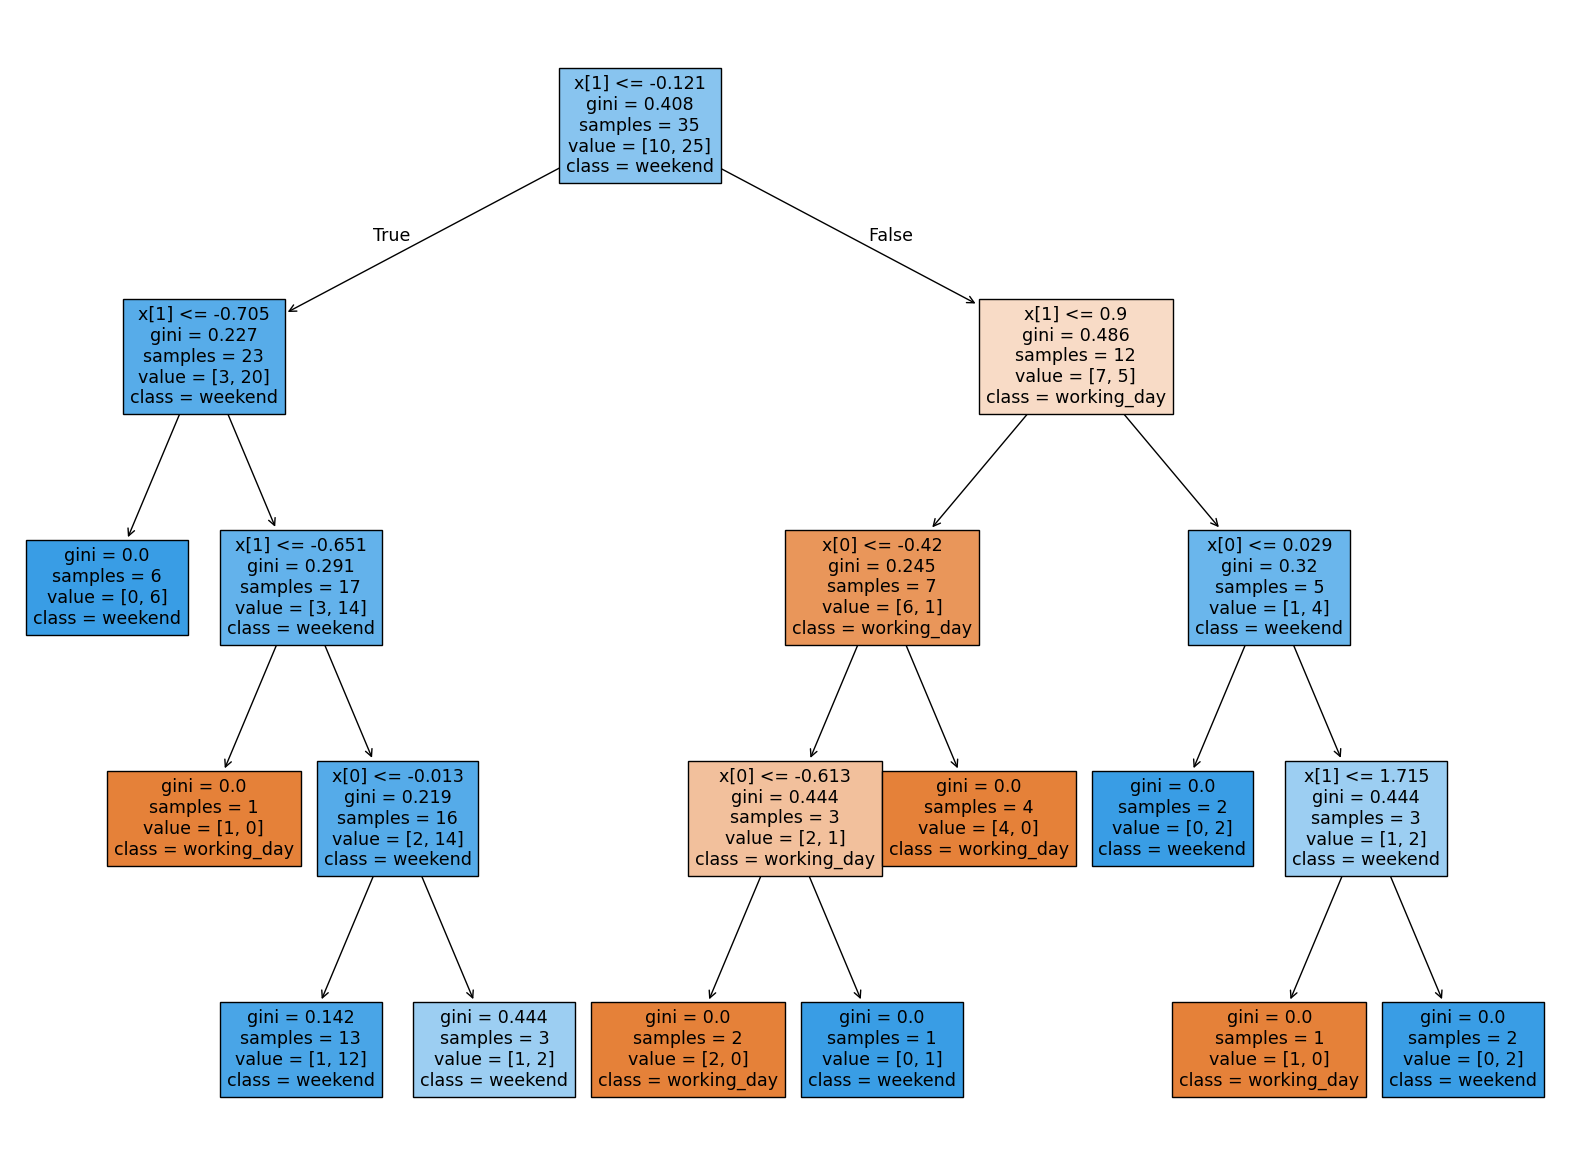

In [203]:
fig, ax = plt.subplots(figsize=(20, 15))

plot_tree(gs.best_estimator_,
          class_names=['working_day', 'weekend'],
          filled=True, ax=ax)
plt.show()

- Видим, что выбрана глубина 4. Чистых листьев - 4.